$$
y = 2x +1 
$$

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2024-03-15 00:51:11.487090: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 00:51:11.489439: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 00:51:11.516600: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 00:51:12.049721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
xs = np.random.randint(-100,100,1000)
ys = 2*xs+1

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=5, input_shape=(1,), name="Hidden"),
    tf.keras.layers.Dense(units=1, name="Output")
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(xs, ys, epochs=64, verbose=1)

Epoch 1/64


/home/alperen/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-03-15 00:51:18.919750: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 00:51:18.920013: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 17266.1484
Epoch 2/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 14216.1143
Epoch 3/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 11286.5557
Epoch 4/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 9507.3076
Epoch 5/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 7911.4565
Epoch 6/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 6439.0732
Epoch 7/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 5160.1909
Epoch 8/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 4156.2417
Epoch 9/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 3365.7478
Epoch 10/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 2478.2808
Epoch 11/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 1878.7490
Epoch 12/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 1380.7668
Epoch 13/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 997.4330
Epoch 14/64
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 676.2576
Epoch 15/64
32/32 ━━━━━━━

In [17]:
tf.keras.utils.plot_model(model,
                          show_dtype=True,
                          show_layer_names = True,
                          show_shapes=True
                          )

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden (Dense)                  │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50 (204.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34 (140.00 B)

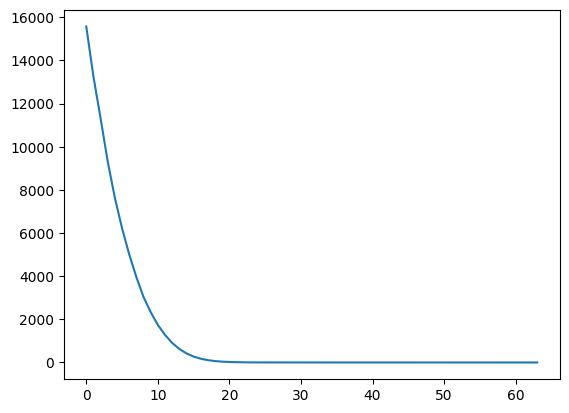

In [12]:
plt.plot(history.history["loss"])

In [13]:
keys = history.history.keys()
print(keys)

dict_keys(['loss'])


In [19]:

test = np.array([-100, 20, 50, 100, 200, 500])
test_actual = np.array(test)*2+1
test_predicted = model.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [20]:
print(test_predicted)

[[-199.28632]
 [  40.66105]
 [ 100.64789]
 [ 200.62596]
 [ 400.58206]
 [1000.4506 ]]


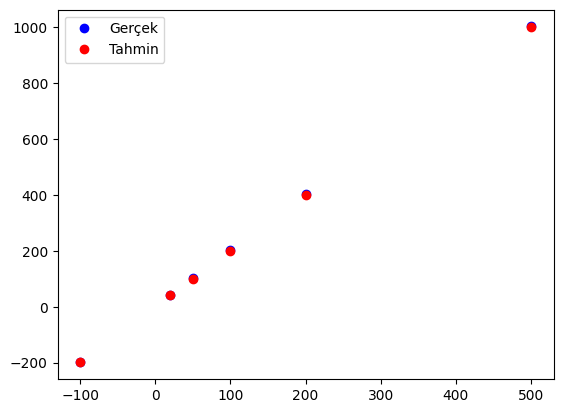

In [21]:
plt.plot(test,test_actual,'bo')
plt.plot(test,test_predicted,'ro')
plt.legend(["Gerçek","Tahmin"])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden (Dense)                  │ (None, 5)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50 (204.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34 (140.00 B)

In [23]:
print(model.get_layer("Hidden").get_weights())

[array([[-0.09559681,  0.97590244, -0.21595596, -0.7163816 , -0.5210053 ]],
      dtype=float32), array([-0.0937898 ,  0.14172293, -0.14661548, -0.1579641 ,  0.0590427 ],
      dtype=float32)]
